### **Onboarding | Tables**

* From looking at the tabs, who is the first person listed in the `people` table?

In [89]:
import pandas as pd
from sqlalchemy import create_engine, null
engine = create_engine("sqlite:///data.sqlite").connect()

In [92]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///data.sqlite")
pd.read_sql_query("SELECT * FROM 'public.people'", engine).head()

,id,name,birthdate,deathdate
0,1,50 Cent,1975-07-06,
1,2,A. Michael Baldwin,1963-04-04,
2,3,A. Raven Cruz,,
3,4,A.J. Buckley,1978-02-09,
4,5,A.J. DeLucia,,


In [4]:
pd.read_sql_query("'DataCamp <3 SQL' AS result", engine)

OperationalError: ignored

In [5]:
pd.read_sql_query("SELECT 'DataCamp <3 SQL' AS result", engine)

,result
0,DataCamp <3 SQL


# **SELECTing single columns**

While SQL can be used to create and modify databases, the focus of this course will be *querying* databases. A *query* is a request for data from a database table (or combination of tables). Querying is an essential skill for a data scientist, since the data you need for your analyses will often live in databases.

In SQL, you can select data from a table using a `SELECT` statement. For example, the following query selects the `name` column from the `people` table:

```
SELECT name
FROM people;
```

In this query, `SELECT` and `FROM` are called keywords. In SQL, keywords are not case-sensitive, which means you can write the same query as:

```
select name
from people;
```

That said, it's good practice to make SQL keywords uppercase to distinguish them from other parts of your query, like column and table names.

It's also good practice (but not necessary for the exercises in this course) to <ins>include a semicolon</ins> at the end of your query. This tells SQL where the end of your query is!

Remember, you can see the results of executing your query in the query tab!

* Select the `title` column from the `films` table.

In [23]:
pd.read_sql_query("SELECT title FROM 'public.films';", engine).head()

,title
0,Intolerance: Love's Struggle Throughout the Ages
1,Over the Hill to the Poorhouse
2,The Big Parade
3,Metropolis
4,Pandora's Box


* Select the `release_year` column from the `films` table.

In [10]:
pd.read_sql_query("SELECT release_year FROM 'public.films';", engine).head()

,release_year
0,1916
1,1920
2,1925
3,1927
4,1929


* Select the `name` of each person in the `people` table.

In [9]:
pd.read_sql_query("SELECT name FROM 'public.people';", engine).head()

,name
0,50 Cent
1,A. Michael Baldwin
2,A. Raven Cruz
3,A.J. Buckley
4,A.J. DeLucia


# **SELECTing multiple columns**

To select multiple columns from a table, simply separate the column names with <ins>commas</ins>!

For example, this query selects two columns, `name` and `birthdate`, from the `people` table:



```
SELECT name, birthdate
FROM people;
```



Sometimes, you may want to select all columns from a table. Typing out every column name would be a pain, so there's a handy shortcut:

```
SELECT *
FROM people;
```

If you only want to return a certain number of results, you can use the `LIMIT` keyword to limit the number of rows returned:



```
SELECT *
FROM people
LIMIT 10;
```


Before getting started with the instructions below, check out the column names in the `films` table!

* Get the `title`, `release_year` and `country` of every film from the `films` table.



In [22]:
pd.read_sql_query("SELECT title, release_year, country FROM 'public.films';", engine).head()

,title,release_year,country
0,Intolerance: Love's Struggle Throughout the Ages,1916,USA
1,Over the Hill to the Poorhouse,1920,USA
2,The Big Parade,1925,USA
3,Metropolis,1927,Germany
4,Pandora's Box,1929,Germany


* Get all columns from the `films` table.

In [15]:
pd.read_sql_query("SELECT * FROM 'public.films' LIMIT 3;", engine)

,id,title,release_year,country,duration,language,certification,gross,budget
0,1,Intolerance: Love's Struggle Throughout the Ages,1916,USA,123,,Not Rated,,385907
1,2,Over the Hill to the Poorhouse,1920,USA,110,,,3000000,100000
2,3,The Big Parade,1925,USA,151,,Not Rated,,245000


# **SELECT DISTINCT**

Often your results will include many duplicate values. If you want to select all the unique values from a column, you can use the `DISTINCT` keyword.

This might be useful if, for example, you're interested in knowing which languages are represented in the `films` table:

```
SELECT DISTINCT language
FROM films;
```


* Get all the unique countries represented in the films table.

In [21]:
pd.read_sql_query('''SELECT DISTINCT country 
                     FROM "public.films"
                     LIMIT 5;''', engine)

,country
0,USA
1,Germany
2,Japan
3,Denmark
4,UK


* Get all the different film `certification`s from the `films` table.

In [19]:
pd.read_sql_query('''SELECT DISTINCT certification 
                     FROM "public.films";''', engine)

,certification
0,Not Rated
1,
2,Passed
3,Unrated
4,Approved
5,G
6,PG
7,R
8,PG-13
9,M


* Get the different types of film `role`s from the `roles` table.

In [20]:
pd.read_sql_query('''SELECT DISTINCT role 
                     FROM "public.roles";''', engine)

,role
0,director
1,actor


# **Learning to COUNT**

What if you want to count the number of employees in your employees table? The `COUNT()` function lets you do this by returning the number of rows in one or more columns.

For example, this code gives the number of rows in the `people` table:



```
SELECT COUNT(*)
FROM people;
```


How many records are contained in the reviews table?

In [24]:
pd.read_sql_query('''SELECT COUNT(*) 
                     FROM "public.reviews";''', engine)

,COUNT(*)
0,4968


# **Practice with COUNT**

As you've seen, `COUNT(*)` tells you how many rows are in a table. However, if you want to count the number of *non-missing* values in a particular column, you can call `COUNT()` on just that column.

For example, to count the number of birth dates present in the `people` table:

```
SELECT COUNT(birthdate)
FROM people;
```

It's also common to combine `COUNT()` with `DISTINCT` to count the number of distinct values in a column.

For example, this query counts the number of distinct birth dates contained in the `people` table:



```
SELECT COUNT(DISTINCT birthdate)
FROM people;
```
* Count the number of rows in the `people` table.

In [26]:
pd.read_sql_query('''SELECT COUNT(*) 
                     FROM "public.people";''', engine)

,COUNT(*)
0,8397


* Count the number of (non-missing) `birthdate` in the `people` table.

In [27]:
pd.read_sql_query('''SELECT COUNT(birthdate) 
                     FROM "public.people";''', engine)

,COUNT(birthdate)
0,8397


* Count the number of unique `birthdate` in the `people` table.

In [30]:
pd.read_sql_query('''SELECT COUNT(DISTINCT birthdate) 
                     FROM "public.people";''', engine)

,COUNT(DISTINCT birthdate)
0,5399


* Count the number of unique `language`s in the `films` table.

In [32]:
pd.read_sql_query('''SELECT COUNT(DISTINCT language) AS count
                     FROM "public.films";''', engine)

,count
0,48


* Count the number of unique countries in the `films` table.

In [33]:
pd.read_sql_query('''SELECT COUNT(DISTINCT country) AS count
                     FROM "public.films";''', engine)

,count
0,65


# **Filtering results**

In SQL, the `WHERE` keyword allows you to filter based on both text and numeric values in a table. There are a few different comparison operators you can use:

* `=` equal
* `<>` not equal
* `<` less than
* `>` greater than
* `<=` less than or equal to
* `>=` greater than or equal to

For example, you can filter text records such as `title`. The following code returns all films with the title `'Metropolis'`:

```
SELECT title
FROM films
WHERE title = 'Metropolis';
```

Notice that the <ins>`WHERE` clause always comes after the `FROM`</ins> statement!

**We will use `<>` and not `!=` for the not equal operator, as per the SQL standard.**

The following query return films released after the year 2000.

```
SELECT title
FROM films
WHERE release_year > 2000;
```



In [18]:
pd.read_sql_query('''SELECT title, release_year
                     FROM "public.films"
                     WHERE release_year > '2000'
                     LIMIT 5;''', engine)

# ถ้าทำในไพธอน ตัวเลข ต้องมีเครื่องเหมายคำพูดด้วย

,title,release_year
0,15 Minutes,2001
1,3000 Miles to Graceland,2001
2,A Beautiful Mind,2001
3,A Knight's Tale,2001
4,A.I. Artificial Intelligence,2001


# **Simple filtering of numeric values**

As you learned in the previous exercise, the `WHERE` clause can also be used to filter numeric records, such as years or ages.

For example, the following query selects all details for films with a budget over ten thousand dollars:



```
SELECT *
FROM films
WHERE budget > 10000;
```


Now it's your turn to use the `WHERE` clause to filter numeric values!

* Get all details for all films released in 2016.

In [20]:
pd.read_sql_query('''SELECT * 
                     FROM "public.films"
                     WHERE release_year = '2016'
                     LIMIT 5;''', engine)

,id,title,release_year,country,duration,language,certification,gross,budget
0,4821,10 Cloverfield Lane,2016,USA,104,English,PG-13,71897215,15000000
1,4822,13 Hours,2016,USA,144,English,R,52822418,50000000
2,4823,A Beginner's Guide to Snuff,2016,USA,87,English,,,
3,4824,Airlift,2016,India,130,Hindi,,,4400000
4,4825,Alice Through the Looking Glass,2016,USA,113,English,PG,76846624,170000000


* Get the number of films released before 2000

In [40]:
pd.read_sql_query('''SELECT COUNT(*) AS count
                     FROM "public.films"
                     WHERE release_year < '2000';''', engine)

,count
0,1379


ไม่แน่ใจว่า ทำไมตัวเลขต่าง

* Get the `title` and `release` year of films released after 2000.

In [50]:
pd.read_sql_query('''SELECT title, release_year
                     FROM "public.films"
                     WHERE release_year > '2000'
                    LIMIT 5;''', engine)

,title,release_year
0,15 Minutes,2001
1,3000 Miles to Graceland,2001
2,A Beautiful Mind,2001
3,A Knight's Tale,2001
4,A.I. Artificial Intelligence,2001


# **Simple filtering of text**

Remember, the `WHERE` clause can also be used to filter text results, such as names or countries.

For example, this query gets the titles of all films which were filmed in China:



```
SELECT title
FROM films
WHERE country = 'China';
```


Now it's your turn to practice using WHERE with text values!

**Important: in PostgreSQL (the version of SQL we're using), you must use single quotes with `WHERE`.**

* Get all details for all French language films.

In [51]:
pd.read_sql_query('''SELECT *
                     FROM "public.films"
                     WHERE language='French'
                     LIMIT 5;''', engine)

,id,title,release_year,country,duration,language,certification,gross,budget
0,108,Une Femme Mariée,1964,France,94,French,,,120000
1,111,Pierrot le Fou,1965,France,110,French,Not Rated,,300000
2,140,Mississippi Mermaid,1969,France,123,French,R,26893,1600000
3,423,Subway,1985,France,98,French,R,,17000000
4,662,Les visiteurs,1993,France,107,French,R,700000,50000000


* Get the `name` and `birthdate` of the person born on November 11th, 1974. Remember to use ISO date format (`'1974-11-11'`)!

In [52]:
pd.read_sql_query('''SELECT name, birthdate
                     FROM "public.people"
                     WHERE birthdate = '1974-11-11'
                     LIMIT 5;''', engine)

,name,birthdate
0,Leonardo DiCaprio,1974-11-11


* Get the number of `Hindi` language films.

In [54]:
pd.read_sql_query('''SELECT COUNT(title) AS count
                     FROM "public.films"
                     WHERE language = 'Hindi';''', engine)

,count
0,28


* Get all details for all films with an `R` `certification`

In [55]:
pd.read_sql_query('''SELECT * 
                     FROM "public.films"
                     WHERE certification = 'R'
                     LIMIT 5;''', engine)

,id,title,release_year,country,duration,language,certification,gross,budget
0,76,Psycho,1960,USA,108,English,R,32000000,806947
1,99,A Fistful of Dollars,1964,Italy,99,Italian,R,3500000,200000
2,134,Rosemary's Baby,1968,USA,136,English,R,,2300000
3,140,Mississippi Mermaid,1969,France,123,French,R,26893,1600000
4,145,The Wild Bunch,1969,USA,144,English,R,,6244087


# **WHERE AND**
Often, you'll want to select data based on multiple conditions. You can build up your `WHERE` queries by combining multiple conditions with the `AND` keyword.

For example,

```
SELECT title
FROM films
WHERE release_year > 1994
AND release_year < 2000;
```

gives you the titles of films released between 1994 and 2000.

Note that you need to specify the column name separately for every `AND` condition, so the following would be invalid:

```
SELECT title
FROM films
WHERE release_year > 1994 AND < 2000;
```

You can add as many `AND` conditions as you need!
* Get the `title` and `release_year` for all `Spanish` language films released before 2000.

In [57]:
pd.read_sql_query('''SELECT title, release_year
                     FROM "public.films"
                     WHERE language = 'Spanish'
                     AND release_year < '2000'
                     LIMIT 5;''', engine)

,title,release_year
0,El Mariachi,1992
1,La otra conquista,1998
2,Tango,1998


* Get all details for `Spanish` language films released after `2000`.

In [58]:
pd.read_sql_query('''SELECT *
                     FROM "public.films"
                     WHERE language = 'Spanish'
                     AND release_year > '2000'
                     LIMIT 5;''', engine)

,id,title,release_year,country,duration,language,certification,gross,budget
0,1695,Y Tu Mamá También,2001,Mexico,106,Spanish,R,13622333,2000000
1,1757,El crimen del padre Amaro,2002,Mexico,118,Spanish,R,5709616,1800000
2,1807,Mondays in the Sun,2002,Spain,113,Spanish,R,146402,4000000
3,2173,Live-In Maid,2004,Argentina,83,Spanish,Unrated,,800000
4,2175,Maria Full of Grace,2004,Colombia,101,Spanish,R,6517198,3000000


* Get all details for `Spanish` language films released after `2000`, but before `2010`.

In [59]:
pd.read_sql_query('''SELECT *
                     FROM "public.films"
                     WHERE language = 'Spanish'
                     AND release_year > '2000'
                     AND release_year < '2010'
                     LIMIT 5;''', engine)

,id,title,release_year,country,duration,language,certification,gross,budget
0,1695,Y Tu Mamá También,2001,Mexico,106,Spanish,R,13622333,2000000
1,1757,El crimen del padre Amaro,2002,Mexico,118,Spanish,R,5709616,1800000
2,1807,Mondays in the Sun,2002,Spain,113,Spanish,R,146402,4000000
3,2173,Live-In Maid,2004,Argentina,83,Spanish,Unrated,,800000
4,2175,Maria Full of Grace,2004,Colombia,101,Spanish,R,6517198,3000000


# **WHERE AND OR**

What if you want to select rows based on multiple conditions where <ins>some but not all</ins> of the conditions need to be met? For this, SQL has the `OR` operator.

For example, the following returns all films released in either 1994 <ins>or</ins> 2000:



```
SELECT title
FROM films
WHERE release_year = 1994
OR release_year = 2000;
```


Note that you need to specify the column for every `OR` condition, so the following is invalid:



```
SELECT title
FROM films
WHERE release_year = 1994 OR 2000;
```


When combining `AND` and `OR`, be sure to enclose the individual clauses in <ins>parentheses</ins>, like so:

Otherwise, due to SQL's precedence rules, you may not get the results you're expecting!


For example, the following query selects all films that were released in 1994 or 1995 which had a rating of PG or R.

```
SELECT title
FROM films
WHERE (release_year = 1994 OR release_year = 1995)
AND (certification = 'PG' OR certification = 'R');
```

* Get the `title` and `release_year` for films released in the 90s.






In [62]:
pd.read_sql_query('''SELECT title, release_year
                     FROM "public.films"
                     WHERE release_year >= '1990'
                     AND release_year < '2000'
                     LIMIT 5;''', engine)

,title,release_year
0,Arachnophobia,1990
1,Back to the Future Part III,1990
2,Child's Play 2,1990
3,Dances with Wolves,1990
4,Days of Thunder,1990


* Now, build on your query to filter the records to only include `French` or `Spanish` language films.

In [66]:
pd.read_sql_query('''SELECT title, release_year
                     FROM "public.films"
                     WHERE (release_year >= '1990' AND release_year < '2000')
                     AND (language = 'Spanish' OR language = 'French');''', engine)

,title,release_year
0,El Mariachi,1992
1,Les visiteurs,1993
2,The Horseman on the Roof,1995
3,When the Cat's Away,1996
4,The Chambermaid on the Titanic,1997
5,The Swindle,1997
6,La otra conquista,1998
7,Les couloirs du temps: Les visiteurs II,1998
8,Tango,1998
9,The Red Violin,1998


* Finally, restrict the query to only return films that took in more than $2M `gross`.

In [83]:
df = pd.read_sql_query('''SELECT title, release_year, gross
                     FROM 'public.films'
                     WHERE (release_year >= '1990' AND release_year < '2000')
                     AND (language = 'French' OR language = 'Spanish')
                     AND gross > '2000000'; ''', engine)

display(df)
print("\n")

df["gross"] = df["gross"].astype(int)
df = df[df["gross"] > 2000000]
df

,title,release_year,gross
0,El Mariachi,1992,2040920
1,Les visiteurs,1993,700000
2,The Chambermaid on the Titanic,1997,244465
3,The Swindle,1997,231417
4,La otra conquista,1998,886410
5,The Red Violin,1998,9473382


,title,release_year,gross
0,El Mariachi,1992,2040920
5,The Red Violin,1998,9473382


In [79]:
help(pd.read_sql_query)

Help on function read_sql_query in module pandas.io.sql:

read_sql_query(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize: Union[int, NoneType] = None) -> Union[pandas.core.frame.DataFrame, Iterator[pandas.core.frame.DataFrame]]
    Read SQL query into a DataFrame.
    
    Returns a DataFrame corresponding to the result set of the query
    string. Optionally provide an `index_col` parameter to use one of the
    columns as the index, otherwise default integer index will be used.
    
    Parameters
    ----------
    sql : str SQL query or SQLAlchemy Selectable (select or text object)
        SQL query to be executed.
    con : SQLAlchemy connectable, str, or sqlite3 connection
        Using SQLAlchemy makes it possible to use any DB supported by that
        library. If a DBAPI2 object, only sqlite3 is supported.
    index_col : str or list of str, optional, default: None
        Column(s) to set as index(MultiIndex).
    coerce_float : bool, def

ไม่รู้เหมือนกัน ทำไมมันมีปัญหากับ `gross > '2000000'` มันอาจจะเป็นเพราะว่า `'2000000'` เป็น string แต่มันควรจะถูกต้องตั้งแต่แรก

# **BETWEEN**

Similar to the `WHERE` clause, the `BETWEEN` clause can be used with multiple `AND` and `OR` operators, so you can build up your queries and make them even more powerful!

For example, suppose we have a table called kids. We can get the names of all kids between the ages of 2 and 12 from the United States:



```
SELECT name
FROM kids
WHERE age BETWEEN 2 AND 12
AND nationality = 'USA';
```

* Get the `title` and `release_year` of all films released between 1990 and 2000 (inclusive).


In [27]:
pd.read_sql_query('''SELECT title, release_year
                     FROM "public.films"
                     WHERE release_year BETWEEN '1990' AND '2000'
                     LIMIT 5;''', engine)

,title,release_year
0,Arachnophobia,1990
1,Back to the Future Part III,1990
2,Child's Play 2,1990
3,Dances with Wolves,1990
4,Days of Thunder,1990


* Now, build on your previous query to select only films that have `budget` over $100 million.

In [35]:
df = pd.read_sql_query('''SELECT title, release_year, budget
                          FROM "public.films"
                          WHERE (release_year BETWEEN '1990' AND '2000')
                          AND budget > '100000000';''', engine)

df["budget"] = df["budget"].astype(int)
df = df[df["budget"] > 100000000]
df.head()


,title,release_year,budget
50,Terminator 2: Judgment Day,1991,102000000
184,True Lies,1994,115000000
251,Waterworld,1995,175000000
359,Batman & Robin,1997,125000000
371,Dante's Peak,1997,116000000


* Now restrict the query to only return Spanish language films.

In [38]:
df = pd.read_sql_query('''SELECT title, release_year, budget, language
                          FROM "public.films"
                          WHERE (release_year BETWEEN '1990' AND '2000')
                          AND budget > '100000000'
                          AND language = 'Spanish';''', engine)


df["budget"] = df["budget"].astype(int)
df = df[df["budget"] > 100000000]
df.head()

,title,release_year,budget,language
2,Tango,1998,700000000,Spanish


*  include all Spanish language or French language films with the same criteria as before. Don't forget your parentheses!

In [39]:
df = pd.read_sql_query('''SELECT title, release_year, budget, language
                          FROM "public.films"
                          WHERE (release_year BETWEEN '1990' AND '2000')
                          AND budget > '100000000'
                          AND (language = 'Spanish' OR language = 'French');''', engine)


df["budget"] = df["budget"].astype(int)
df = df[df["budget"] > 100000000]
df.head()

,title,release_year,budget,language
5,Les couloirs du temps: Les visiteurs II,1998,140000000,French
6,Tango,1998,700000000,Spanish


# **WHERE IN**
As you've seen, `WHERE` is very useful for filtering results. However, if you want to filter based on many conditions, `WHERE` can get unwieldy. For example:



```
SELECT name
FROM kids
WHERE age = 2
OR age = 4
OR age = 6
OR age = 8
OR age = 10;
```


Enter the `IN` operator! The `IN` operator allows you to specify multiple values in a `WHERE` clause, making it easier and quicker to specify multiple `OR` conditions.

So, the above example would become simply:

```
SELECT name
FROM kids
WHERE age IN (2, 4, 6, 8, 10);
```

* Get the `title` and `release_year` of all films released in 1990 or 2000 where `duration` was longer than two hours. Remember, `duration` is in minutes!

In [58]:
df = pd.read_sql_query('''SELECT title, release_year, duration FROM 'public.films'
                          WHERE release_year IN ('1990', '2000')
                          AND duration > ('120');''', engine)

df["duration"] = df["duration"].astype(int)
df = df[df["duration"] > 120]
df.head()

,title,release_year,duration
1,Dances with Wolves,1990,236
2,Die Hard 2,1990,124
3,Ghost,1990,127
4,Goodfellas,1990,146
8,Mo' Better Blues,1990,129


* Get the `title` and `language` of all films which were in English, Spanish, or French.

In [59]:
pd.read_sql_query('''SELECT title, language FROM 'public.films'
                     WHERE language IN ('English', 'Spanish', 'French')
                     LIMIT 5;''', engine)

,title,language
0,The Broadway Melody,English
1,Hell's Angels,English
2,A Farewell to Arms,English
3,42nd Street,English
4,She Done Him Wrong,English


* Get the `title` and `certification` of all films with an `NC-17` or `R` certification.

In [60]:
pd.read_sql_query('''SELECT title, certification 
                     FROM 'public.films'
                     WHERE certification IN ('NC-17', 'R')
                     LIMIT 5;''', engine)

,title,certification
0,Psycho,R
1,A Fistful of Dollars,R
2,Rosemary's Baby,R
3,Mississippi Mermaid,R
4,The Wild Bunch,R


# **Introduction to NULL and IS NULL**

In SQL, `NULL` represents a missing or unknown value. You can check for `NULL` values using the expression `IS NULL`. For example, to count the number of missing birth dates in the `people` table:

```
SELECT COUNT(*)
FROM people
WHERE birthdate IS NULL;
```

As you can see, `IS NULL` is useful when combined with `WHERE` to figure out <ins>what data you're missing</ins>.

Sometimes, you'll want to filter out missing values so you only get results which are not `NULL`. To do this, you can use the `IS NOT NULL` operator.

For example, this query gives the names of all people whose birth dates are not missing in the people table.

```
SELECT name
FROM people
WHERE birthdate IS NOT NULL;
```
* Get the `name`s of people who are still alive, i.e. whose `deathdate` is missing.

## เหมือนจะมีปัญหาที่ยังแก้กันอยู่ในการอ่าน NULL values ด้วย `pd.read_sql_query`


In [88]:
df = pd.read_sql_query('''SELECT name, deathdate FROM 'public.people'
                          WHERE deathdate IS NULL;''', engine)

* Get the `title` of every film which doesn't have a `budget` associated with it.



```
SELECT title FROM films
WHERE budget IS NULL
```

* Get the number of films which don't have a language associated with them.



```
SELECT COUNT(*) FROM films
WHERE language IS NULL
```





# **LIKE and NOT LIKE**

As you've seen, the `WHERE` clause can be used to filter text data. However, so far you've only been able to filter by specifying the <ins>*exact*</ins> text you're interested in. In the real world, often you'll want to search for a pattern rather than a specific text string.

In SQL, the `LIKE` operator can be used in a `WHERE` clause to search for a pattern in a column. To accomplish this, you use something called a <ins>*wildcard*</ins> as a placeholder for some other values. There are two wildcards you can use with `LIKE`:

* The `%` wildcard will match zero, one, or many characters in text. For example, the following query matches companies like `'Data'`, `'DataC'` `'DataCamp'`, `'DataMind'`, and so on:



```
SELECT name
FROM companies
WHERE name LIKE 'Data%';
```

* The `_` wildcard will match a single character. For example, the following query matches companies like `'DataCamp'`, `'DataComp'`, and so on:



```
SELECT name
FROM companies
WHERE name LIKE 'DataC_mp';
```


You can also use the `NOT LIKE` operator to find records that don't match the pattern you specify.

* Get the names of all people whose names begin with `'B'`. The pattern you need is `'B%'`.



In [96]:
pd.read_sql_query('''SELECT name 
                     FROM 'public.people'
                     WHERE name LIKE 'B%'
                     LIMIT 5;''', con=engine)

,name
0,B.J. Novak
1,Babak Najafi
2,Babar Ahmed
3,Bahare Seddiqi
4,Bai Ling


* Get the `name`s of people whose names have `'r'` as the second letter. The pattern you need is `'_r%'`.

In [97]:
pd.read_sql_query('''SELECT name 
                     FROM 'public.people'
                     WHERE name LIKE '_r%'
                     LIMIT 5;''', con=engine)

,name
0,Ara Celi
1,Aramis Knight
2,Arben Bajraktaraj
3,Arcelia Ramírez
4,Archie Kao


* Get the names of people whose names don't start with A. The pattern you need is `'A%'`.

In [98]:
pd.read_sql_query('''SELECT name 
                     FROM 'public.people'
                     WHERE name NOT LIKE 'A%'
                     LIMIT 5;''', con=engine)

,name
0,50 Cent
1,Álex Angulo
2,Álex de la Iglesia
3,Ángela Molina
4,B.J. Novak


# **Aggregate functions**

Often, you will want to perform some calculation on the data in a database. SQL provides a few functions, called aggregate functions, to help you out with this.

For example,

```
SELECT AVG(budget)
FROM films;
```


gives you the average value from the budget column of the films table. Similarly, the `MAX()` function returns the highest budget:



```
SELECT MAX(budget)
FROM films;
```


The `SUM()` function returns the result of adding up the numeric values in a column:



```
SELECT SUM(budget)
FROM films;
```


You can probably guess what the `MIN()` function does! Now it's your turn to try out some SQL functions.

* Use the `SUM()` function to get the total duration of all films.

In [99]:
pd.read_sql_query('''SELECT SUM(duration) AS sum
                     FROM 'public.films';''', con=engine)

,sum
0,534882.0


* Get the average duration of all films.

In [104]:
pd.read_sql_query('''SELECT AVG(duration)
                     FROM 'public.films';''', con=engine)

,AVG(duration)
0,107.665459


* Get the duration of the shortest film.

In [105]:
pd.read_sql_query('''SELECT MIN(duration)
                     FROM 'public.films';''', con=engine)

,MIN(duration)
0,


* Get the duration of the longest film.

In [106]:
pd.read_sql_query('''SELECT MAX(duration)
                     FROM 'public.films';''', con=engine)

,MAX(duration)
0,99


`MAX()` กับ `MIN()` ดูจะมีปัญหา เพราะค่าจริงๆต้องได้แบบนี้

In [126]:
df = pd.read_sql_query("SELECT duration FROM 'public.films'", engine)
df = df[df["duration"] != ''] # ตัวที่เป็น string ว่าง คือ NULL แต่ pd.read_sql_query จัดการพวกนี้ไม่ได้ ?
df["duration"] = df["duration"].astype(int)
print(df["duration"].max())
print(df["duration"].min())
print(df["duration"].mean())
print(df["duration"].sum())

334
7
107.94793138244198
534882


* Use the `SUM()` function to get the total amount grossed by all films.

In [127]:
pd.read_sql_query('''SELECT SUM(gross)
                     FROM 'public.films';''', con=engine)

,SUM(gross)
0,2.025158e+11


* Get the average amount grossed by all films.

In [128]:
pd.read_sql_query('''SELECT AVG(gross)
                     FROM 'public.films';''', con=engine)

,AVG(gross)
0,4.076406e+07


`MIN()` และ `MAX()` มีปัญหา

In [130]:
pd.read_sql_query('''SELECT MAX(gross)
                     FROM 'public.films';''', con=engine)

,MAX(gross)
0,99851


In [131]:
df = pd.read_sql_query("SELECT gross FROM 'public.films'", engine)
df = df[df["gross"] != ''] # ตัวที่เป็น string ว่าง คือ NULL แต่ pd.read_sql_query จัดการพวกนี้ไม่ได้ ?
df["gross"] = df["gross"].astype(int)
print(df["gross"].max())
print(df["gross"].min())
print(df["gross"].mean())
print(df["gross"].sum())

936627416
162
48705108.25733526
202515840134


# **Combining aggregate functions with WHERE**

Aggregate functions can be combined with the `WHERE` clause to gain further insights from your data.

For example, to get the total budget of movies made in the year 2010 or later:



```
SELECT SUM(budget)
FROM films
WHERE release_year >= 2010;
```

* Use the `SUM()` function to get the total amount grossed by all films made in the year 2000 or later.



In [132]:
pd.read_sql_query('''SELECT SUM(gross)
                     FROM 'public.films'
                     WHERE release_year >= '2000';''', con=engine)

,SUM(gross)
0,1.509009e+11


* Get the average amount grossed by all films whose titles start with the letter `'A'`.

In [133]:
pd.read_sql_query('''SELECT AVG(gross)
                     FROM 'public.films'
                     WHERE title LIKE 'A%';''', con=engine)

,AVG(gross)
0,3.825528e+07


* Get the amount grossed by the worst performing film in 1994.

In [134]:
pd.read_sql_query('''SELECT MIN(gross)
                     FROM 'public.films'
                     WHERE release_year = '1994';''', con=engine)

,MIN(gross)
0,


* Get the amount grossed by the best performing film between 2000 and 2012, inclusive.

In [135]:
pd.read_sql_query('''SELECT MAX(gross)
                     FROM 'public.films'
                     WHERE release_year BETWEEN '2000' AND '2012';''', con=engine)

,MAX(gross)
0,99851


In [152]:
df = pd.read_sql_query("SELECT * FROM 'public.films'", engine)
df = df[df["gross"] != ''] # ตัวที่เป็น string ว่าง คือ NULL แต่ pd.read_sql_query จัดการพวกนี้ไม่ได้ ?
df = df[df["release_year"] != '']
df["gross"] = df["gross"].astype(int)
df["release_year"] = df["release_year"].astype(int)
print(df.loc[df["release_year"]==1994, "gross"].min())
print(df.loc[(df["release_year"]<2012) & (df["release_year"]>2000), "gross"].max())

125169
760505847


# **A note on arithmetic**

In addition to using aggregate functions, you can perform basic arithmetic with symbols like `+`, `-`, `*`, and `/`.

So, for example, this gives a result of `12`:

`SELECT (4 * 3);`

However, the following gives a result of `1`:

`SELECT (4 / 3);`

What's going on here?

SQL assumes that <ins>if you divide **an integer** by **an integer**, you want to get **an integer** back.</ins> So be careful when dividing!

If you want more precision when dividing, you can <ins>**add decimal**</ins> places to your numbers. For example,

`SELECT (4.0 / 3.0) AS result;`

gives you the result you would expect: 1.333.

What is the result of `SELECT (10 / 3);`

In [3]:
pd.read_sql_query("SELECT (10/3) AS result", engine)

,result
0,3


# **It's AS simple AS aliasing**

Aliasing simply means you assign a temporary name to something. To alias, you use the `AS` keyword.

```
SELECT MAX(budget) AS max_budget,
       MAX(duration) AS max_duration
FROM films;
```

* Get the `title` and net profit (the amount a film `gross`ed, minus its `budget`) for all films. Alias the net profit as `net_profit`.



```
SELECT title, gross, budget, gross-budget AS net_profit
FROM films
```

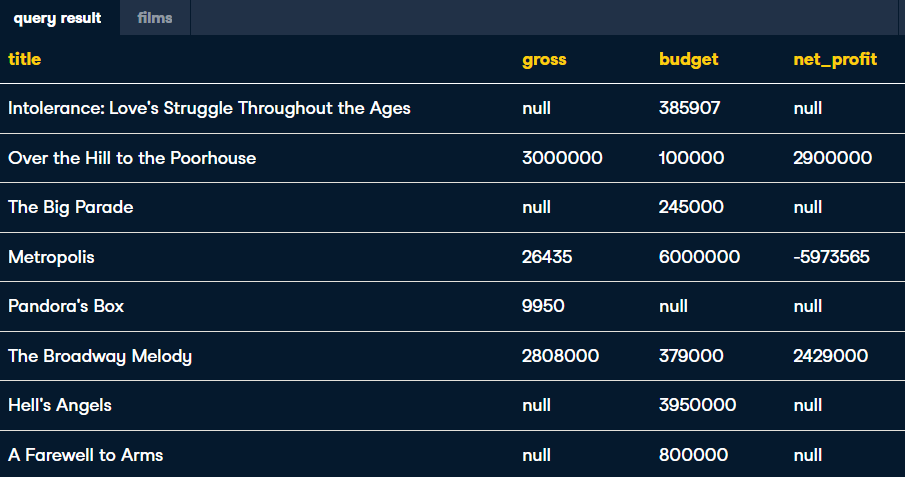





เนื่องจากการใช้ NULL Values ใน sqlalchemy ต้องไปทำใน database จะแสดงผลแบบเดียวกันใช้ `pandas` ดีกว่า

In [21]:
import numpy as np
df = pd.read_sql_query('''SELECT title, gross, budget
                          FROM 'public.films';''', con=engine)
for col in ["gross", "budget"]:
    df.loc[df[col] == "", col] = np.nan
    df[col] = df[col].astype(float)

df["net_profit"] = df["gross"] - df["budget"]
df.head()


,title,gross,budget,net_profit
0,Intolerance: Love's Struggle Throughout the Ages,NaN,385907.0,NaN
1,Over the Hill to the Poorhouse,3000000.0,100000.0,2900000.0
2,The Big Parade,NaN,245000.0,NaN
3,Metropolis,26435.0,6000000.0,-5973565.0
4,Pandora's Box,9950.0,NaN,NaN


* Get the `title` and `duration` in hours for all films. The duration is in minutes, so you'll need to divide by `60.0` to get the duration in hours. Alias the duration in hours as `duration_hours`.

In [23]:
pd.read_sql_query("SELECT title, duration/60.0 AS duration_hours FROM 'public.films' LIMIT 5;", engine)

,title,duration_hours
0,Intolerance: Love's Struggle Throughout the Ages,2.050000
1,Over the Hill to the Poorhouse,1.833333
2,The Big Parade,2.516667
3,Metropolis,2.416667
4,Pandora's Box,1.833333


* Get the average duration in hours for all films, aliased as `avg_duration_hours`.

In [26]:
pd.read_sql_query("SELECT AVG(duration)/60.0 AS avg_duration_hours FROM 'public.films';", con=engine)

,avg_duration_hours
0,1.794424


# **Even more aliasing**

Recall: SQL assumes that <ins>if you divide an *integer* by an *integer*, you want to get an *integer* back</ins>.

This means that the following will erroneously result in `400.0`:

`SELECT 45 / 10 * 100.0;`

This is because `45 / 10` evaluates to an integer (`4`), and not a decimal number like we would expect.

So when you're dividing make sure at least one of your numbers has a decimal place:

* Get the percentage of people who are no longer alive. Alias the result as `percentage_dead`. Remember to use `100.0` and not `100`!

In [29]:
pd.read_sql_query("SELECT COUNT(deathdate)*100.0/COUNT(*) AS percentage_dead FROM 'public.people';", con=engine)

,percentage_dead
0,100.0


ไม่ถูกแน่นอน เพราะ `deathdate` มี NULL เยอะ

In [41]:
import numpy as np
df = pd.read_sql_query("SELECT deathdate FROM 'public.people';", engine)
df.loc[df["deathdate"]==""] = np.nan
df[df["deathdate"] !=  np.nan].count() / df.shape[0] * 100.0

deathdate    9.372395
dtype: float64

* Get the number of years between the newest film and oldest film. Alias the result as `difference`.



```
SELECT MAX(release_year)-MIN(release_year) AS difference
FROM films
```
* Get the number of decades the `films` table covers. Alias the result as `number_of_decades`. The top half of your fraction should be enclosed in parentheses.



```
SELECT (MAX(release_year) - MIN(release_year))/10 AS number_of_decades
FROM films;
```




# **ORDER BY**

In SQL, the `ORDER BY` keyword is used to sort results in ascending or descending order according to the values of one or more columns.

By default `ORDER BY` will sort in <ins>ascending</ins> order. If you want to sort the results in descending order, you can use the `DESC` keyword. For example,

```
SELECT title
FROM films
ORDER BY release_year DESC;
```


gives you the titles of films sorted by release year, from newest to oldest.

# **Sorting single columns**

* Get the `name`s of people from the `people` table, sorted alphabetically.

In [2]:
pd.read_sql_query('''SELECT name 
                     FROM 'public.people'
                     ORDER BY name
                     LIMIT 5;''', con=engine)

,name
0,50 Cent
1,A. Michael Baldwin
2,A. Raven Cruz
3,A.J. Buckley
4,A.J. DeLucia


* Get the `name`s of people, sorted by `birthdate`


```
SELECT name, birthdate 
FROM people 
ORDER BY birthdate
```



In [36]:
df = pd.read_sql_query('''SELECT name, birthdate
                          FROM 'public.people'
                          ORDER BY birthdate ''', con=engine)
df = df[df["birthdate"] != ""]
df.head()

,name,birthdate
2245,Robert Shaw,1837-10-10
2246,Lucille La Verne,1872-11-07
2247,Mary Carr,1874-03-14
2248,D.W. Griffith,1875-01-22
2249,Finlay Currie,1878-01-20


* Get the `title` of films released in `2000` or `2012`, in the order they were released.

In [16]:
pd.read_sql_query('''SELECT title, release_year 
                     FROM 'public.films'
                     WHERE release_year IN ('2000', '2012')
                     ORDER BY release_year
                     LIMIT 5;''', engine).set_index("title")

,release_year
title,
102 Dalmatians,2000
28 Days,2000
3 Strikes,2000
Aberdeen,2000
All the Pretty Horses,2000


* Get all details for all films except those released in `2015` and order them by `duration`.



```
SELECT * FROM films
WHERE release_year <> 2015
ORDER BY duration
```



In [22]:
df = pd.read_sql_query('''SELECT * 
                          FROM 'public.films'
                          WHERE release_year <> '2015';''', engine)

df = df[df["duration"] != ""]
df["duration"] = df["duration"].astype(int)
df.sort_values(by="duration").set_index("id").head()

,title,release_year,country,duration,language,certification,gross,budget
id,,,,,,,,
2926,The Touch,2007,USA,7,English,,,13000
4098,Vessel,2012,USA,14,English,,,
2501,Wal-Mart: The High Cost of Low Price,2005,USA,20,English,Not Rated,,1500000
4927,"10,000 B.C.",,,22,,,,
4929,Anger Management,,USA,22,English,,,


* Get the `title` and `gross` earnings for movies which begin with the letter `'M'` and order the results alphabetically.

In [23]:
pd.read_sql_query('''SELECT title, gross
                     FROM 'public.films'
                     WHERE title LIKE 'M%'
                     ORDER BY title
                     LIMIT 5;''', engine)

,title,gross
0,MacGruber,8460995
1,Machete,26589953
2,Machete Kills,7268659
3,Machine Gun McCain,
4,Machine Gun Preacher,537580


# **Sorting single columns (DESC)**

To order results in descending order, you can put the keyword `DESC` after your `ORDER BY`. For example, to get all the` name`s in the `people` table, in reverse alphabetical order:

```
SELECT name
FROM people
ORDER BY name DESC;
```

* Get the `imdb_score` and `film_id` for every film from the `reviews` table, sorted from highest to lowest score.

In [25]:
pd.read_sql_query('''SELECT imdb_score, film_id
                     FROM 'public.reviews'
                     ORDER BY imdb_score DESC
                     LIMIT 5;''', engine)

,imdb_score,film_id
0,9.5,4960
1,9.30000019,742
2,9.19999981,178
3,9.10000038,4866
4,9,3110


* Get the `title` for every `film`, in reverse order.

In [26]:
pd.read_sql_query('''SELECT title
                     FROM 'public.films'
                     ORDER BY title DESC
                     LIMIT 5;''', engine)

,title
0,Æon Flux
1,xXx: State of the Union
2,xXx
3,eXistenZ
4,[Rec] 2


* Get the `title` and `duration` for every film, in order of longest `duration` to shortest.



```
SELECT title, duration 
FROM films
ORDER BY duration DESC
```



In [31]:
df = pd.read_sql_query('''SELECT title, duration
                          FROM 'public.films';''', engine)
df = df[df["duration"] != ""]
df["duration"] = df["duration"].astype(int)
df.sort_values(by="duration", ascending=False).head()

,title,duration
4931,Carlos,334
648,"Blood In, Blood Out",330
267,Heaven's Gate,325
1665,The Legend of Suriyothai,300
286,Das Boot,293


# **Sorting multiple columns**

`ORDER BY` can also be used to sort on multiple columns. It will sort by the first column specified, then sort by the next, then the next, and so on. For example,



```
SELECT birthdate, name
FROM people
ORDER BY birthdate, name;
```



sorts on birth dates first (oldest to newest) and then sorts on the names in alphabetical order. The order of columns is important!

* Get the `birthdate` and `name` of people in the `people` table, in order of when they were born and alphabetically by name.


```
SELECT birthdate, name 
FROM people
ORDER BY birthdate, name
```



In [37]:
df = pd.read_sql_query('''SELECT birthdate, name 
                          FROM "public.people"
                          ORDER BY birthdate, name;''', engine)
df = df[df["birthdate"] != ""]
df.head()

,birthdate,name
2245,1837-10-10,Robert Shaw
2246,1872-11-07,Lucille La Verne
2247,1874-03-14,Mary Carr
2248,1875-01-22,D.W. Griffith
2249,1878-01-20,Finlay Currie


* Get the `release_year`, `duration`, and `title` of films ordered by their `release_year` and `duration`.

In [41]:
df = pd.read_sql_query('''SELECT release_year, duration, title 
                          FROM "public.films"
                          ORDER BY release_year, duration;''', engine)
df = df[df["release_year"] != ""].set_index("release_year")
df.head()

,duration,title
release_year,,
1916,123,Intolerance: Love's Struggle Throughout the Ages
1920,110,Over the Hill to the Poorhouse
1925,151,The Big Parade
1927,145,Metropolis
1929,100,The Broadway Melody


* Get `certification`s, `release_year`s, and `title`s of films ordered by `certification` (alphabetically) and `release_year`.

In [43]:
df = pd.read_sql_query('''SELECT certification, release_year, title 
                          FROM "public.films"
                          ORDER BY certification, release_year;''', engine)
df = df[df["certification"] != ""]
df.head()

,certification,release_year,title
302,Approved,1933,She Done Him Wrong
303,Approved,1935,Top Hat
304,Approved,1936,The Charge of the Light Brigade
305,Approved,1937,Snow White and the Seven Dwarfs
306,Approved,1937,The Prisoner of Zenda


Get the `name`s and `birthdate`s of `people` ordered by `name` and `birthdate`.

In [51]:
df = pd.read_sql_query('''SELECT name, birthdate
                          FROM "public.people"
                          ORDER BY name, birthdate;''', engine)
df.loc[df["birthdate"] == "", "birthdate"] = "null"
df.head()


,name,birthdate
0,50 Cent,1975-07-06
1,A. Michael Baldwin,1963-04-04
2,A. Raven Cruz,null
3,A.J. Buckley,1978-02-09
4,A.J. DeLucia,null


# **GROUP BY**

Often you'll need to aggregate results. For example, you might want to count the number of male and female employees in your company. Here, what you want is to group all the males together and count them, and group all the females together and count them. In SQL, `GROUP BY` allows you to group a result by one or more columns, like so:



```
SELECT sex, count(*)
FROM employees
GROUP BY sex;
```


This might give, for example:

sex	count
male	15
female	19

```
sex	   count
male	    15
female	  19
```

Commonly, `GROUP BY` is used with aggregate functions like `COUNT()` or `MAX()`. Note that <ins>`GROUP BY` always goes after the `FROM`</ins>.

# **GROUP BY practice**

As you've just seen, combining aggregate functions with `GROUP BY` can yield some powerful results!

A word of warning: <ins>SQL will return an error if you try to `SELECT` a field that is not in your `GROUP BY` clause without using it to calculate some kind of value about the entire group.</ins>

Note that you can combine `GROUP BY` with `ORDER BY` to group your results, calculate something about them, and then order your results. For example,

```
SELECT sex, count(*)
FROM employees
GROUP BY sex
ORDER BY count DESC;
```


might return something like



```
sex	          count
female	         19
male	           15
```
because there are more females at our company than males. Note also that <ins>`ORDER BY` always goes after `GROUP BY`</ins>. Let's try some exercises!

* Get the `release_year` and `count` of films released in each year.



In [55]:
df = pd.read_sql_query('''SELECT release_year, COUNT(*) AS count
                          FROM "public.films"
                          GROUP BY release_year;''', engine)
df = df[df["release_year"] != ""]
df.head()

,release_year,count
1,1916,1
2,1920,1
3,1925,1
4,1927,1
5,1929,2


* Get the `release_year` and average `duration` of all films, grouped by `release_year`.

In [59]:
df = pd.read_sql_query('''SELECT release_year, AVG(duration) AS avg
                          FROM "public.films"
                          GROUP BY release_year;''', engine)
df.loc[df["release_year"] == "", "release_year"] = "null"
df.head()

,release_year,avg
0,null,75.595238
1,1916,123.000000
2,1920,110.000000
3,1925,151.000000
4,1927,145.000000


* Get the `release_year` and largest `budget` for all films, grouped by `release_year`.

In [63]:
df = pd.read_sql_query('''SELECT release_year, MAX(budget) AS max
                          FROM "public.films"
                          GROUP BY release_year;''', engine)
df.loc[df["release_year"] == "", "release_year"] = "null"
df.head()

,release_year,max
0,null,5000000
1,1916,385907
2,1920,100000
3,1925,245000
4,1927,6000000


* Get the `imdb_score` and count of film reviews grouped by `imdb_score` in the reviews table.

In [66]:
df = pd.read_sql_query('''SELECT imdb_score, COUNT(*) AS count
                          FROM "public.reviews"
                          GROUP BY imdb_score;''', engine)
df.head()

,imdb_score,count
0,1.60000002,1
1,1.70000005,1
2,1.89999998,3
3,2,2
4,2.0999999,3


# **GROUP BY practice (2)**

Now practice your new skills by combining `GROUP BY` and `ORDER BY` with some more aggregate functions!

Make sure to always <ins>put the `ORDER BY` clause **at the end** of your query</ins>. You can't sort values that you haven't calculated yet!

* Get the `release_year` and lowest `gross` earnings per `release_year`.



```
SELECT release_year, MIN(gross) 
FROM films
GROUP BY release_year

```



In [67]:
df = pd.read_sql_query('''SELECT release_year, MIN(gross) AS min
                          FROM "public.films"
                          GROUP BY release_year;''', engine)
df.head()

,release_year,min
0,,
1,1916,
2,1920,3000000
3,1925,
4,1927,26435


* Get the `language` and total `gross` amount films in each `language` made.

In [68]:
df = pd.read_sql_query('''SELECT language, SUM(gross) AS sum
                          FROM "public.films"
                          GROUP BY language;''', engine)
df.head()

,language,sum
0,,4319281.0
1,Aboriginal,78680789.0
2,Arabic,1681831.0
3,Aramaic,499263.0
4,Bosnian,301305.0


* Get the `country` and total `budget` spent making movies in each country.

In [71]:
pd.read_sql_query('''SELECT country, SUM(budget) AS sum
                     FROM "public.films"
                     GROUP BY country LIMIT 5;''', engine)

,country,sum
0,,3.500000e+06
1,Afghanistan,4.600000e+04
2,Argentina,5.700000e+06
3,Aruba,3.500000e+07
4,Australia,1.558606e+09


* Get the `release_year`, `country`, and highest `budget` spent making a film for each year, for each country. Sort your results by `release_year` and `country`.



```
SELECT release_year, country, MAX(budget) FROM films
GROUP BY release_year, country
ORDER BY release_year, country
```



In [85]:
df = pd.read_sql_query('''SELECT release_year, country, budget
                          FROM "public.films";''', engine)
for col in ["release_year", "country", "budget"]:
    df = df[df[col] != ""]

df.groupby(["release_year", "country"]).max().sort_values(by=["release_year", "country"]).head(10)

,,budget
release_year,country,
1916,USA,385907
1920,USA,100000
1925,USA,245000
1927,Germany,6000000
1929,USA,379000
1930,USA,3950000
1932,USA,800000
1933,USA,439000
1934,USA,325000


* Get the country, release year, and lowest amount grossed per release year per country. Order your results by country and release year.



```
SELECT country, release_year, MIN(gross) FROM films
GROUP BY release_year, country
ORDER BY country, release_year
```



In [88]:
df = pd.read_sql_query('''SELECT country, release_year, gross
                          FROM "public.films";''', engine)
for col in ["release_year", "country", "gross"]:
    df = df[df[col] != ""]

df.groupby(["country", "release_year"]).min().sort_values(by=["country", "release_year"]).head(10)

gross
country     release_year           
Afghanistan 2003            1127331
Argentina   2000            1221261
            2004             304124
            2009           20167424
Aruba       1998           10076136
Australia   1981            9003011
            1985           36200000
            1986          174635000
            1988          109306210
            1989             882290

# **HAVING a great time**
In SQL, aggregate functions can't be used in `WHERE` clauses. For example, the following query is invalid:

```
SELECT release_year
FROM films
GROUP BY release_year
WHERE COUNT(title) > 10;
```

This means that if you want to filter based on the result of an aggregate function, you need another way! That's where the `HAVING` clause comes in. For example,

```
SELECT release_year
FROM films
GROUP BY release_year
HAVING COUNT(title) > 10;
```
shows only those years in which more than 10 films were released.

* How many different years were more than 200 movies released?

```
SELECT release_year
FROM films
GROUP BY release_year
HAVING COUNT(*) > 200
```





In [100]:
pd.read_sql_query('''SELECT release_year
                     FROM "public.films"
                     GROUP BY release_year
                     HAVING COUNT(*) > 200;''', engine).shape[0]

13

# **All together now**

Time to practice using `ORDER BY`, `GROUP BY` and `HAVING` together.

Now you're going to write a query that returns the average budget and average gross earnings for films in each year after 1990, if the average budget is greater than $60 million.



```
SELECT AVG(budget) AS avg_budget, AVG(gross) AS AVG(gross), release_year
FROM films
WHERE release_year > 1990
GROUP BY release_year
HAVING AVG(budget) > 60000000
ORDER BY AVG(gross) DESC
```



In [111]:
df = pd.read_sql_query('''SELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross
                          FROM "public.films"
                          WHERE release_year > '1990'
                          GROUP BY release_year
                          HAVING AVG(budget) > 60000000;''', engine)
df

,release_year,avg_budget,avg_gross
0,2005,6.459620e+07,3.780681e+07
1,2006,8.409824e+07,3.561083e+07


ปีถูก แต่ตัวเลขไม่ถูก

In [137]:
import numpy as np

df = pd.read_sql_query('''SELECT release_year, budget, gross
                          FROM "public.films"
                          WHERE release_year > '1990';''', engine)
for col in ["budget", "gross"]:
    df.loc[df[col] == "", col] = np.nan
    df[col] = df[col].astype(float)

df.groupby(df["release_year"]).filter(lambda df: df["budget"].mean() > 60000000).groupby(df["release_year"]).mean()

,budget,gross
release_year,,
2005,7.032394e+07,4.115914e+07
2006,9.396893e+07,3.923786e+07


Get the country, average budget, and average gross take of countries that have made more than 10 films. Order the result by country name, and limit the number of results displayed to 5. You should alias the averages as avg_budget and avg_gross respectively.

In [139]:
import numpy as np

df = pd.read_sql_query('''SELECT country, budget, gross
                          FROM "public.films";''', engine)

for col in ["budget", "gross"]:
    df.loc[df[col] == "", col] = np.nan
    df[col] = df[col].astype(float)

df.groupby(df["country"]).filter(lambda x: len(x) > 10).groupby(df["country"]).mean().sort_values(by="country").head()

,budget,gross
country,,
Australia,3.117211e+07,4.020591e+07
Canada,1.479846e+07,2.243207e+07
China,6.221900e+07,1.414304e+07
Denmark,1.392222e+07,1.418469e+06
France,3.067203e+07,1.635059e+07


# **JOIN**

What if you want to see the `imdb_score` for a particular movie?

In this case, you'd want to get the `ID` of the movie from the `films` table and then use it to get `imdb_score` from the `reviews` table. In SQL, this concept is known as a `join`.

The query below gets the `imdb_score` for the film `To Kill a Mockingbird!`.

As you can see, `join`s are incredibly useful and important to understand for anyone using SQL.

```
SELECT title, imdb_score
FROM films
JOIN reviews
ON films.id = reviews.film_id
WHERE title = 'To Kill a Mockingbird';
```
What is the IMDB score for the film To Kill a Mockingbird?


In [144]:
pd.read_sql_query('''SELECT title, imdb_score
                     FROM 'public.films'
                     JOIN 'public.reviews'
                     ON 'public.films'.id = 'public.reviews'.film_id
                     WHERE title = 'To Kill a Mockingbird';''', con=engine)

,title,imdb_score
0,To Kill a Mockingbird,8.39999962
